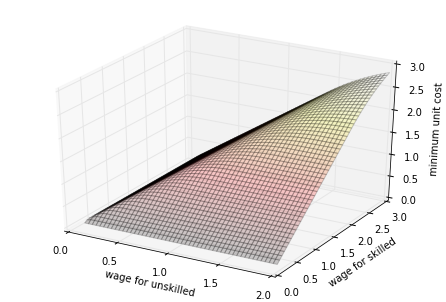

In [50]:
"""
this is the picture of minimum unit cost of two kinds of labors, namely, unskilled and skilled going through 
a representative supply chain.
for more details, see my paper IPCs with GSCs
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

lambda_u=0.8
lambda_s=0.1

def s_star(w_u, w_s):
    temp1=(w_s/lambda_s-w_u/lambda_u)*lambda_s
    temp2=(lambda_u-lambda_s)*w_u/lambda_u
    if temp1<=temp2:
        return 0
    elif temp1>=temp2*np.exp(lambda_u):
        return 1
    else:
        return np.log(temp1/temp2)/lambda_u
def lu1(sstar):
    return (np.exp((lambda_u-lambda_s)*sstar)-np.exp(-lambda_s*sstar))*np.exp(lambda_s)/lambda_u
def ls1(sstar):
    return (np.exp(-lambda_s*sstar)-np.exp(-lambda_s))*np.exp(lambda_s)/lambda_s
def c(w_u, w_s):
    sstar=s_star(w_u, w_s)
    return w_u*lu1(sstar)+w_s*ls1(sstar)

from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig=figure()
ax=Axes3D(fig)
x=np.linspace(0.1, 2, 50)
y=np.linspace(0.1, 3, 50)
x, y=np.meshgrid(x, y, sparse=True)
cc=np.zeros([50, 50])
for i in range(50):
    for j in range(50):
        cc[j][i]=c(x[0][i], y[j])
ax.plot_surface(x, y, cc, rstride=1, cstride=1, cmap=plt.cm.hot, color='grey', alpha=0.2)
ax.set_xlabel("wage for unskilled")
ax.set_ylabel("wage for skilled")
ax.set_zlabel("minimum unit cost")
show()